In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from datetime import datetime, timedelta

In [3]:
product = pd.read_csv('./data/product.csv', on_bad_lines='skip')
product

transaction = pd.read_csv('./data/transaction_new.csv')
customer = pd.read_csv('./data/customer.csv')
click_stream = pd.read_csv('./data/click_stream_book.csv')

In [4]:
product['gender'].value_counts()

Men       22147
Women     18631
Unisex     2161
Boys        830
Girls       655
Name: gender, dtype: int64

In [5]:
product

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [6]:
customer = customer.assign(first_join_date=pd.to_datetime(customer['first_join_date']))
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         100000 non-null  int64         
 1   first_name          100000 non-null  object        
 2   last_name           100000 non-null  object        
 3   username            100000 non-null  object        
 4   email               100000 non-null  object        
 5   gender              100000 non-null  object        
 6   birthdate           100000 non-null  object        
 7   device_type         100000 non-null  object        
 8   device_id           100000 non-null  object        
 9   device_version      100000 non-null  object        
 10  home_location_lat   100000 non-null  float64       
 11  home_location_long  100000 non-null  float64       
 12  home_location       100000 non-null  object        
 13  home_country        100000 non

# Customer Gender, Sex

## Age

In [7]:
customer = customer.assign(birthdate=pd.to_datetime(customer['birthdate']))

In [8]:
customer = customer.assign(age=2022-customer['birthdate'].dt.year)
customer

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,26
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,29
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,33
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,31
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,Manah,Mustofa,bf989ab1-d7eb-4ad5-b4bc-29e3cf69b35c,bf989ab1_d7eb_4ad5_b4bc_29e3cf69b35c@startupca...,M,2000-11-17,Android,fa1914a5-0c12-4393-8d6c-af4e4a4de6aa,Android 4.3.1,-5.203523,105.635530,Lampung,Indonesia,2020-10-17,22
99996,72065,Danu,Pradana,4af2b3d5-c573-4032-b29c-24782745a2f6,4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...,M,1998-03-30,Android,d8234d67-6954-4e05-8293-d37ef25bfd7e,Android 8.0.0,4.474702,95.904876,Aceh,Indonesia,2017-11-25,24
99997,32818,Talia,Aryani,af0edbfa-f354-4765-813b-b9f151022555,af0edbfa_f354_4765_813b_b9f151022555@startupca...,F,1993-01-12,Android,3c586f64-aab7-4dd6-be94-5d47c6361081,Android 11,-3.330376,127.028348,Maluku,Indonesia,2018-09-01,29
99998,75597,Ajimat,Mansur,35cd82f3-6b86-42a2-bb15-933770d7f250,35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...,M,2000-09-13,Android,3b209c58-d305-4b46-9363-b90a3914f008,Android 7.1,-2.173114,101.495913,Jambi,Indonesia,2020-05-31,22


In [207]:
customer['gender'].value_counts()

F    64230
M    35770
Name: gender, dtype: int64

In [9]:
customer['age'].describe()

count    100000.000000
mean         26.516130
std           7.275733
min           6.000000
25%          21.000000
50%          26.000000
75%          31.000000
max          68.000000
Name: age, dtype: float64

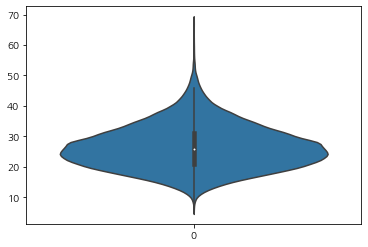

In [10]:
sns.violinplot(customer['age'])
plt.show()

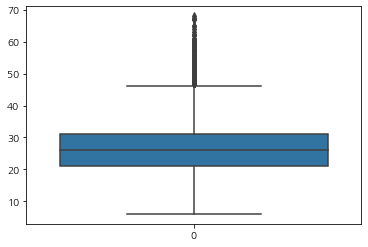

In [11]:
sns.boxplot(customer['age'])
plt.show()

In [12]:
# 이를 이용해 유저별 가장 최근 접속 일자를 알 수 있다. 
transaction = transaction.assign(created_at=pd.to_datetime(transaction['created_at'])+timedelta(hours=7))
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   created_at              1254585 non-null  datetime64[ns, UTC]
 1   customer_id             1254585 non-null  int64              
 2   booking_id              1254585 non-null  object             
 3   session_id              1254585 non-null  object             
 4   payment_method          1254585 non-null  object             
 5   payment_status          1254585 non-null  object             
 6   promo_amount            1254585 non-null  int64              
 7   promo_code              481139 non-null   object             
 8   shipment_fee            1254585 non-null  int64              
 9   shipment_date_limit     1254585 non-null  object             
 10  shipment_location_lat   1254585 non-null  float64            
 11  shipment_lo

In [13]:
click_stream = click_stream.assign(event_time=pd.to_datetime(click_stream['event_time'])+timedelta(hours=7))
click_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12463004 entries, 0 to 12463003
Data columns (total 12 columns):
 #   Column           Dtype              
---  ------           -----              
 0   session_id       object             
 1   event_name       object             
 2   event_time       datetime64[ns, UTC]
 3   event_id         object             
 4   traffic_source   object             
 5   product_id       float64            
 6   quantity         float64            
 7   item_price       float64            
 8   payment_status   object             
 9   search_keywords  object             
 10  promo_code       object             
 11  promo_amount     float64            
dtypes: datetime64[ns, UTC](1), float64(4), object(7)
memory usage: 1.1+ GB


In [14]:
click_stream

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,00001f29-3ede-4445-95f0-0178934e32ba,HOMEPAGE,2019-05-17 18:51:52.276396+00:00,51793173-664c-4557-8a06-fc37587bea3d,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00001f29-3ede-4445-95f0-0178934e32ba,ADD_TO_CART,2019-05-18 02:54:53.276396+00:00,517b331c-4296-4772-a1a2-9bf7500a5570,MOBILE,33855.0,6.0,237967.0,NaN,NaN,NaN,NaN
2,00001f29-3ede-4445-95f0-0178934e32ba,HOMEPAGE,2019-05-18 02:55:12.276396+00:00,2c0581d2-3185-4172-87ea-795ee26a4d0a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00001f29-3ede-4445-95f0-0178934e32ba,CLICK,2019-05-18 10:58:25.276396+00:00,81982a1d-5562-44e8-8b1d-1c3366434c5e,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00001f29-3ede-4445-95f0-0178934e32ba,CLICK,2019-05-18 19:02:44.276396+00:00,6f7980bf-dce4-4b1e-9ffa-5c37499c4dc7,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12462999,fffffaf6-55ee-428b-a3bf-075cd7f1a093,ITEM_DETAIL,2018-08-20 20:46:27.790374+00:00,0f3593ec-5341-4cee-b119-79dfd266911a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12463000,fffffaf6-55ee-428b-a3bf-075cd7f1a093,ITEM_DETAIL,2018-08-22 16:00:29.790374+00:00,24415771-d466-41a1-8cfb-aa6dc8f6cb40,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12463001,fffffaf6-55ee-428b-a3bf-075cd7f1a093,ITEM_DETAIL,2018-08-24 11:20:30.790374+00:00,d52f1455-633d-448b-a704-c68ac1bd8156,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12463002,fffffaf6-55ee-428b-a3bf-075cd7f1a093,PROMO_PAGE,2018-08-26 06:35:58.790374+00:00,7689a2ca-e91e-4f79-97ae-f702c153ed6b,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
click_stream['traffic_source'].value_counts()

MOBILE    11214521
WEB        1248483
Name: traffic_source, dtype: int64

In [16]:
from IPython.display import Image

# RFM Seg

- Recency : 최근에 언제 접속했는가?
- Frequency : 얼마나 자주 접속 했는가?
- Moneyrtary : 총 구매액을 기준으로?

## Recency

In [18]:
transaction = transaction.sort_values('created_at').reset_index(drop=True)
transaction

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2016-07-01 06:18:44.792905+00:00,74089,2dd76c45-6ddb-46b4-9c91-c59d4f9b76ba,607d864b-76b5-45a1-a45d-7fb666a03ea1,LinkAja,Success,0,NaN,10000,2016-07-04T17:35:37.193849Z,-0.763643,112.421541,640795,33314,3,210265
1,2016-07-01 09:53:26.720195+00:00,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,OVO,Success,6053,XX2022,10000,2016-07-06T03:05:41.261218Z,-6.218370,106.888089,578826,16061,1,163539
2,2016-07-01 09:53:26.720195+00:00,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,OVO,Success,6053,XX2022,10000,2016-07-06T03:05:41.261218Z,-6.218370,106.888089,578826,7588,1,411340
3,2016-07-01 16:45:51.803842+00:00,16228,8035f5b3-2a7c-4e30-ab4a-9b3091edc37f,bbff775e-4166-46aa-bbfd-4ba6465add17,Debit Card,Success,0,NaN,15000,2016-07-03T19:10:36.530785Z,-2.617531,115.421835,333792,47650,1,318792
4,2016-07-02 05:32:45.218400+00:00,73773,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,Debit Card,Success,0,NaN,10000,2016-07-06T16:02:10.388144Z,-1.066405,113.575300,256670,32185,1,246670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2022-08-01 06:58:50.469277+00:00,81975,bbee4544-3d89-44f4-8fb7-d1796d3cd45e,6d4c72ec-b900-4c45-a37e-9cfe18452fc7,Debit Card,Success,0,NaN,0,2022-08-04T21:34:30.005045Z,-6.125269,106.961855,852675,50710,1,100566
1254581,2022-08-01 06:58:53.821469+00:00,19551,a465f4f3-6b1e-4421-9e71-979775a68c6c,9b4975c7-b06d-4d9a-b6b8-6bcda06540ea,Credit Card,Success,5800,WEEKENDSERU,10000,2022-08-05T06:00:29.292277Z,-6.723003,111.355794,144842,17773,1,140642
1254582,2022-08-01 06:59:03.408424+00:00,22285,a43bfc27-6a49-465b-8690-901b8d79acef,f837b3a2-7908-42df-8969-3f879ebb4c25,LinkAja,Success,0,NaN,5000,2022-08-05T14:56:15.207147Z,0.185578,112.415543,155339,27404,1,150339
1254583,2022-08-01 06:59:19.821469+00:00,19551,1f9b9f8a-1a72-4e4c-87a6-355390a7abf6,b0043d8b-2b6a-443a-80f2-567486e79bf9,Gopay,Success,0,NaN,5000,2022-08-04T15:27:36.340498Z,-6.235832,106.783260,202327,25189,1,197327


In [19]:
end_time = transaction.sort_values('created_at').iloc[-1]['created_at']
transaction = transaction.assign(time_diff=end_time-transaction['created_at'])
transaction['time_diff']

0         2222 days 00:41:01.028564
1         2221 days 21:06:19.101274
2         2221 days 21:06:19.101274
3         2221 days 14:13:54.017627
4         2221 days 01:27:00.603069
                     ...           
1254580      0 days 00:00:55.352192
1254581             0 days 00:00:52
1254582      0 days 00:00:42.413045
1254583             0 days 00:00:26
1254584             0 days 00:00:00
Name: time_diff, Length: 1254585, dtype: timedelta64[ns]

In [20]:
customer.sort_values('customer_id')

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age
10919,1,Unjani,Suartini,44416517-a404-4a99-b9e3-53dfe90e5c5d,44416517_a404_4a99_b9e3_53dfe90e5c5d@zakyfound...,F,1999-03-12,iOS,cf185388-60c8-4523-b59b-7acc54af2b07,iPhone; CPU iPhone OS 7_1_2 like Mac OS X,-2.728020,114.215521,Kalimantan Tengah,Indonesia,2016-11-27,23
42099,2,Carla,Susanti,584001fe-7d65-4676-8bb5-a99339dbaa53,584001fe_7d65_4676_8bb5_a99339dbaa53@zakyfound...,F,1991-01-18,Android,1c1b049e-f621-45ee-aae3-9d4c87aad9b3,Android 4.3,-6.010465,107.292582,Jawa Barat,Indonesia,2021-12-25,31
29119,3,Ganep,Mustofa,76412a05-64ab-4e8c-b275-a7181b5c0b9d,76412a05_64ab_4e8c_b275_a7181b5c0b9d@startupca...,M,1986-07-12,Android,dd0c9125-c645-4b82-8d4b-a1cd1e2dba20,Android 3.2.3,-6.151858,106.945839,Jakarta Raya,Indonesia,2018-08-25,36
78327,4,Yance,Rahimah,1bfce80e-7e43-4344-849c-c9d53668bd22,1bfce80e_7e43_4344_849c_c9d53668bd22@startupca...,F,1995-03-17,Android,5bedc038-0687-4f15-b0ae-b61cc5eebf3e,Android 1.1,0.349326,109.061486,Kalimantan Barat,Indonesia,2021-03-22,27
18836,5,Luluh,Rajasa,860000ba-7a4c-4c17-9e98-184cf234dcdb,860000ba_7a4c_4c17_9e98_184cf234dcdb@zakyfound...,M,1994-07-21,iOS,8b107b3e-52b6-47a9-94ee-08197db3824b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-6.138983,106.873723,Jakarta Raya,Indonesia,2021-12-18,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94443,99996,Chandra,Budiyanto,72c564f7-bc2f-4a7e-bffc-6b879a812ef2,72c564f7_bc2f_4a7e_bffc_6b879a812ef2@startupca...,M,2003-11-14,Android,a8206f4b-e07e-4870-a6b2-20ca9d750c7d,Android 3.2.2,-3.699470,120.047102,Sulawesi Selatan,Indonesia,2022-04-13,19
54318,99997,Rizki,Firgantoro,6ffa0a09-d47d-4ab8-8e09-737c9cc213ba,6ffa0a09_d47d_4ab8_8e09_737c9cc213ba@zakyfound...,M,2004-10-06,iOS,5bd16bbc-7c79-4e2e-ac13-9f842f234c77,iPhone; CPU iPhone OS 12_4_8 like Mac OS X,-8.791134,118.804722,Nusa Tenggara Barat,Indonesia,2020-04-25,18
56085,99998,Tami,Fujiati,eaecfca2-11c8-4714-9bf0-6a8e0dbc24da,eaecfca2_11c8_4714_9bf0_6a8e0dbc24da@zakyfound...,F,2014-05-21,Android,e74adfb1-142f-411d-a34a-e306edffd19d,Android 3.2.3,-4.092411,105.179376,Lampung,Indonesia,2018-07-01,8
47676,99999,Purwadi,Simanjuntak,8ac8eae0-142f-4975-9f7f-38004e77945b,8ac8eae0_142f_4975_9f7f_38004e77945b@startupca...,M,2010-02-11,Android,3aa61867-4fca-445e-b87f-ef7de1ea469d,Android 3.2.1,-4.876648,104.598266,Lampung,Indonesia,2016-10-12,12


In [21]:
last_access_time_by_customer = transaction.groupby('customer_id')['created_at'].max().to_frame().reset_index()
last_access_time_by_customer = last_access_time_by_customer.rename(columns={'created_at':'last_access_time'})
last_access_time_by_customer = last_access_time_by_customer.assign(time_diff=end_time-last_access_time_by_customer['last_access_time'])
last_access_time_by_customer # <- 요거 세그멘테이션 하면 됨

,customer_id,last_access_time,time_diff
0,3,2022-06-26 22:41:52.844494+00:00,35 days 08:17:52.976975
1,8,2022-05-16 05:46:22.656991+00:00,77 days 01:13:23.164478
2,9,2022-05-28 15:44:32.421034+00:00,64 days 15:15:13.400435
3,11,2022-03-07 21:29:13.759159+00:00,146 days 09:30:32.062310
4,15,2022-01-05 13:07:58.105040+00:00,207 days 17:51:47.716429
...,...,...,...
50700,99992,2022-05-25 16:32:49.873510+00:00,67 days 14:26:55.947959
50701,99995,2022-07-29 10:54:17.810263+00:00,2 days 20:05:28.011206
50702,99997,2020-04-26 01:38:16.825127+00:00,827 days 05:21:28.996342
50703,99998,2022-01-25 07:54:09.703960+00:00,187 days 23:05:36.117509


In [22]:
last_access_time_by_customer['time_diff'].describe()

count                          50705
mean     299 days 14:18:44.391237272
std      436 days 04:15:27.167847832
min                  0 days 00:00:00
25%          39 days 03:33:33.870188
50%         110 days 02:18:59.972104
75%         359 days 20:22:07.077138
max        2221 days 01:27:00.603069
Name: time_diff, dtype: object

## Frequency

In [23]:
# 인도네시아 계절을 봤을 땐 우기 5개월, 건기 7개월이었음
# 유저별로 트랜잭션을 나눈 뒤 -> 기간별로 몇 번이나 왔는지를 횟수를 세야함 

In [24]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   created_at              1254585 non-null  datetime64[ns, UTC]
 1   customer_id             1254585 non-null  int64              
 2   booking_id              1254585 non-null  object             
 3   session_id              1254585 non-null  object             
 4   payment_method          1254585 non-null  object             
 5   payment_status          1254585 non-null  object             
 6   promo_amount            1254585 non-null  int64              
 7   promo_code              481139 non-null   object             
 8   shipment_fee            1254585 non-null  int64              
 9   shipment_date_limit     1254585 non-null  object             
 10  shipment_location_lat   1254585 non-null  float64            
 11  shipment_lo

In [25]:
frq = transaction[['customer_id','created_at','session_id']].rename(columns={'created_at':'access_time'})
frq = frq.assign(access_quarter=frq['access_time'].dt.to_period('Q'))
frq

C:\Users\baejinhyun\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\arrays\datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


,customer_id,access_time,session_id,access_quarter
0,74089,2016-07-01 06:18:44.792905+00:00,607d864b-76b5-45a1-a45d-7fb666a03ea1,2016Q3
1,6183,2016-07-01 09:53:26.720195+00:00,c5d3792d-9220-47db-ad80-4932f3f88d0e,2016Q3
2,6183,2016-07-01 09:53:26.720195+00:00,c5d3792d-9220-47db-ad80-4932f3f88d0e,2016Q3
3,16228,2016-07-01 16:45:51.803842+00:00,bbff775e-4166-46aa-bbfd-4ba6465add17,2016Q3
4,73773,2016-07-02 05:32:45.218400+00:00,8f385c80-1b70-4861-80ac-5eb3b5620fee,2016Q3
...,...,...,...,...
1254580,81975,2022-08-01 06:58:50.469277+00:00,6d4c72ec-b900-4c45-a37e-9cfe18452fc7,2022Q3
1254581,19551,2022-08-01 06:58:53.821469+00:00,9b4975c7-b06d-4d9a-b6b8-6bcda06540ea,2022Q3
1254582,22285,2022-08-01 06:59:03.408424+00:00,f837b3a2-7908-42df-8969-3f879ebb4c25,2022Q3
1254583,19551,2022-08-01 06:59:19.821469+00:00,b0043d8b-2b6a-443a-80f2-567486e79bf9,2022Q3


## Moneytary

In [142]:
transaction_trend = transaction.assign(access_ym=transaction['created_at'].dt.strftime('%Y-%m'))
transaction_trend = transaction_trend.assign(access_year = transaction_trend['created_at'].dt.year)
transaction_trend = transaction_trend.assign(access_month = transaction_trend['created_at'].dt.month)
transaction_trend = transaction_trend.assign(access_day = transaction_trend['created_at'].dt.day)
transaction_trend = transaction_trend.assign(access_day_of_week = transaction_trend['created_at'].dt.day_of_week)
transaction_trend = transaction_trend.assign(total_item_price_krw=round(transaction_trend['item_price'] * transaction_trend['quantity'] * 0.085))
transaction_trend

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,product_id,quantity,item_price,time_diff,access_ym,access_year,access_month,access_day,access_day_of_week,total_item_price_krw
0,2016-07-01 06:18:44.792905+00:00,74089,2dd76c45-6ddb-46b4-9c91-c59d4f9b76ba,607d864b-76b5-45a1-a45d-7fb666a03ea1,LinkAja,Success,0,NaN,10000,2016-07-04T17:35:37.193849Z,...,33314,3,210265,2222 days 00:41:01.028564,2016-07,2016,7,1,4,53618.0
1,2016-07-01 09:53:26.720195+00:00,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,OVO,Success,6053,XX2022,10000,2016-07-06T03:05:41.261218Z,...,16061,1,163539,2221 days 21:06:19.101274,2016-07,2016,7,1,4,13901.0
2,2016-07-01 09:53:26.720195+00:00,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,OVO,Success,6053,XX2022,10000,2016-07-06T03:05:41.261218Z,...,7588,1,411340,2221 days 21:06:19.101274,2016-07,2016,7,1,4,34964.0
3,2016-07-01 16:45:51.803842+00:00,16228,8035f5b3-2a7c-4e30-ab4a-9b3091edc37f,bbff775e-4166-46aa-bbfd-4ba6465add17,Debit Card,Success,0,NaN,15000,2016-07-03T19:10:36.530785Z,...,47650,1,318792,2221 days 14:13:54.017627,2016-07,2016,7,1,4,27097.0
4,2016-07-02 05:32:45.218400+00:00,73773,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,Debit Card,Success,0,NaN,10000,2016-07-06T16:02:10.388144Z,...,32185,1,246670,2221 days 01:27:00.603069,2016-07,2016,7,2,5,20967.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2022-08-01 06:58:50.469277+00:00,81975,bbee4544-3d89-44f4-8fb7-d1796d3cd45e,6d4c72ec-b900-4c45-a37e-9cfe18452fc7,Debit Card,Success,0,NaN,0,2022-08-04T21:34:30.005045Z,...,50710,1,100566,0 days 00:00:55.352192,2022-08,2022,8,1,0,8548.0
1254581,2022-08-01 06:58:53.821469+00:00,19551,a465f4f3-6b1e-4421-9e71-979775a68c6c,9b4975c7-b06d-4d9a-b6b8-6bcda06540ea,Credit Card,Success,5800,WEEKENDSERU,10000,2022-08-05T06:00:29.292277Z,...,17773,1,140642,0 days 00:00:52,2022-08,2022,8,1,0,11955.0
1254582,2022-08-01 06:59:03.408424+00:00,22285,a43bfc27-6a49-465b-8690-901b8d79acef,f837b3a2-7908-42df-8969-3f879ebb4c25,LinkAja,Success,0,NaN,5000,2022-08-05T14:56:15.207147Z,...,27404,1,150339,0 days 00:00:42.413045,2022-08,2022,8,1,0,12779.0
1254583,2022-08-01 06:59:19.821469+00:00,19551,1f9b9f8a-1a72-4e4c-87a6-355390a7abf6,b0043d8b-2b6a-443a-80f2-567486e79bf9,Gopay,Success,0,NaN,5000,2022-08-04T15:27:36.340498Z,...,25189,1,197327,0 days 00:00:26,2022-08,2022,8,1,0,16773.0


In [143]:
paid_transaction_trend = transaction_trend[transaction_trend['payment_status']=='Success'].sort_values('created_at')
unpaid_transaction_trend = transaction_trend[transaction_trend['payment_status']=='Failed'].sort_values('created_at')

In [144]:
# PU
paid_transaction_trend['customer_id'].nunique()

50242

### amount_by_customer

In [216]:
# 전체 고객(기간 X) 중에서 누가 가장 돈을 많이 썼는지 -> 연간 VIP랑은 관계 없음, 그저 우량 고객(큰손)을 찾기 위함

amount_by_customer = paid_transaction_trend.groupby('customer_id')['total_item_price_krw'].sum().to_frame().reset_index()
total_amount_by_customer = amount_by_customer.sort_values('total_item_price_krw', ascending=False).reset_index(drop=True)
total_amount_by_customer

,customer_id,total_item_price_krw
0,43202,26976674.0
1,29496,25051652.0
2,82237,21494164.0
3,52130,20924511.0
4,64659,20062186.0
...,...,...
50237,45683,3040.0
50238,29529,2534.0
50239,18584,2475.0
50240,21527,2333.0


In [223]:
Top_10per_sales = total_amount_by_customer['total_item_price_krw'].quantile(0.9)
Top_10per_sales

2009641.8

In [225]:
top_10per = total_amount_by_customer[total_amount_by_customer['total_item_price_krw']>Top_10per_sales]
top_10per

,customer_id,total_item_price_krw
0,43202,26976674.0
1,29496,25051652.0
2,82237,21494164.0
3,52130,20924511.0
4,64659,20062186.0
...,...,...
5020,2259,2010709.0
5021,95894,2010211.0
5022,5428,2010017.0
5023,25194,2009703.0


In [226]:
top_10per_customer_idx = top_10per['customer_id'].to_list()
top_10per_customer = customer[customer['customer_id'].isin(top_10per_customer_idx)]
top_10per_customer

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,33
14,94370,Septi,Winarsih,964732f6-88fb-48cc-aeec-a788f3dcc276,964732f6_88fb_48cc_aeec_a788f3dcc276@zakyfound...,F,1998-06-28,Android,38766a93-4a69-4613-b835-268a4824de2c,Android 4.0.4,-7.783962,113.869488,Jawa Timur,Indonesia,2018-02-24,24
57,46018,Limar,Prabowo,c338fdcd-e1c4-4010-a20f-b1fac763d5c6,c338fdcd_e1c4_4010_a20f_b1fac763d5c6@startupca...,M,1995-10-27,iOS,a0203f8c-f041-416c-8055-0f381f6489ef,iPad; CPU iPad OS 9_3_6 like Mac OS X,-6.175562,106.930918,Jakarta Raya,Indonesia,2019-07-14,27
77,96570,Vino,Gunawan,6eaaf06d-cec7-4064-85d6-5dc9b496cc7a,6eaaf06d_cec7_4064_85d6_5dc9b496cc7a@zakyfound...,M,1999-02-28,Android,b74e80ec-32a2-4a78-881d-08b65a9fee5d,Android 6.0.1,-8.243490,114.545949,Bali,Indonesia,2017-07-30,23
96,1777,Devi,Andriani,96f9958e-505a-41b0-9dd0-c22150688f35,96f9958e_505a_41b0_9dd0_c22150688f35@startupca...,F,2000-05-09,iOS,5758039e-5a38-423a-9f95-a9cf4ef2ab15,iPhone; CPU iPhone OS 4_2_1 like Mac OS X,-6.613383,106.848101,Jawa Barat,Indonesia,2019-11-02,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99973,66067,Kamal,Hakim,8ee637c7-78cd-4691-b2f6-f7d989698956,8ee637c7_78cd_4691_b2f6_f7d989698956@startupca...,M,2002-06-04,Android,bacddbc7-46f3-4938-b4bb-de154203016e,Android 1.5,-8.356793,112.653530,Jawa Timur,Indonesia,2018-03-10,20
99982,35089,Edi,Hidayat,9cdf8b1b-08f5-414e-8e6a-55e2424e614f,9cdf8b1b_08f5_414e_8e6a_55e2424e614f@startupca...,M,1986-08-12,Android,1ede2e83-9f93-4901-bc67-37fd0656f7be,Android 2.2.1,-7.808392,110.759671,Jawa Tengah,Indonesia,2016-07-17,36
99983,42753,Zelda,Yuliarti,0901c8f5-bf96-41b8-a214-c56195c68909,0901c8f5_bf96_41b8_a214_c56195c68909@startupca...,F,1980-09-13,Android,81de256f-687e-4db5-a6df-f251c86941a5,Android 4.0.3,-2.482135,101.736452,Jambi,Indonesia,2017-07-01,42
99996,72065,Danu,Pradana,4af2b3d5-c573-4032-b29c-24782745a2f6,4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...,M,1998-03-30,Android,d8234d67-6954-4e05-8293-d37ef25bfd7e,Android 8.0.0,4.474702,95.904876,Aceh,Indonesia,2017-11-25,24


In [257]:
temp = pd.concat([customer.value_counts('gender').sort_index(), top_10per_customer.value_counts('gender').sort_index()], axis=1).rename(columns={0:'total_counts', 1:'top10_counts'})
temp2 =pd.concat([customer.value_counts('gender', normalize=True).sort_index()*100, top_10per_customer.value_counts('gender', normalize=True).sort_index()*100], axis=1).rename(columns={0:'_percent', 1:'top10_percent'})
pd.concat([temp, temp2], axis=1)

,total_counts,top10_counts,_percent,top10_percent
gender,,,,
F,64230,3198,64.23,63.641791
M,35770,1827,35.77,36.358209


In [244]:
print(f'전체 고객의 평균 나이는 {customer["age"].mean().round(1)}세 입니다.')
print(f'상위 10퍼센트 고객의 평균 나이는 {top_10per_customer["age"].mean().round(1)}세 입니다.')

전체 고객의 평균 나이는 26.5세 입니다.
상위 10퍼센트 고객의 평균 나이는 26.4세 입니다.


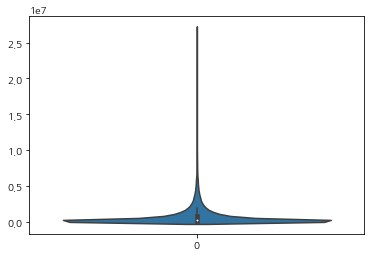

In [147]:
sns.violinplot(total_amount_by_customer['total_item_price_krw'])
plt.show()

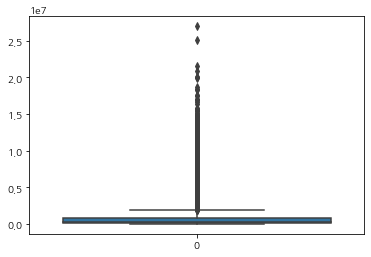

In [148]:
sns.boxplot(total_amount_by_customer['total_item_price_krw'])
plt.show()

### amount_by_customer  2021

In [150]:
amount_by_customer_month = paid_transaction_trend.groupby(['customer_id', 'access_year'])['total_item_price_krw'].agg(['sum', 'mean']).reset_index()
amount_by_customer_month = amount_by_customer_month.rename(columns={'mean':'avg_sales_krw', 'sum':'total_sales_krw'})
amount_by_customer_month = amount_by_customer_month.assign(total_sales_krw = amount_by_customer_month['total_sales_krw'].astype(int))
amount_by_customer_month

,customer_id,access_year,total_sales_krw,avg_sales_krw
0,3,2018,130681,26136.200000
1,3,2019,452438,30162.533333
2,3,2020,384656,22626.823529
3,3,2021,537135,25577.857143
4,3,2022,252581,22961.909091
...,...,...,...,...
140468,99998,2019,55912,27956.000000
140469,99998,2020,63374,21124.666667
140470,99998,2021,72256,36128.000000
140471,99998,2022,358222,22388.875000


In [151]:
total_amount_by_customer_month = amount_by_customer_month.sort_values('total_sales_krw', ascending=False).reset_index(drop=True)
total_amount_by_customer_month

,customer_id,access_year,total_sales_krw,avg_sales_krw
0,95492,2021,9417116,35806.524715
1,9079,2022,7576691,36780.053398
2,13789,2021,5763837,33706.649123
3,61147,2022,5706321,38556.222973
4,29496,2021,5671084,37807.226667
...,...,...,...,...
140468,76395,2018,2165,2165.000000
140469,38090,2016,2086,2086.000000
140470,54192,2019,2015,2015.000000
140471,17847,2018,1903,1903.000000


In [152]:
# 2021년 구매 고객 중 누가 많이 구매했는지 찾기 -> VIP 선정

total_amount_by_customer_month_2021 = total_amount_by_customer_month.loc[total_amount_by_customer_month['access_year']==2021].reset_index(drop=True)
total_amount_by_customer_month_2021

,customer_id,access_year,total_sales_krw,avg_sales_krw
0,95492,2021,9417116,35806.524715
1,13789,2021,5763837,33706.649123
2,29496,2021,5671084,37807.226667
3,32658,2021,5527646,37348.959459
4,34082,2021,5252116,38336.613139
...,...,...,...,...
36082,8026,2021,3041,3041.000000
36083,79305,2021,2857,2857.000000
36084,18584,2021,2475,2475.000000
36085,21527,2021,2333,2333.000000


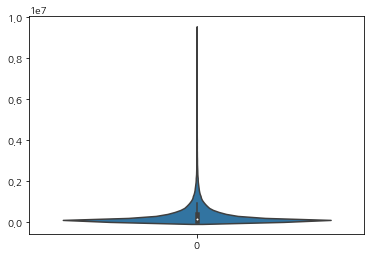

In [153]:
sns.violinplot(total_amount_by_customer_month_2021['total_sales_krw'])
plt.show()

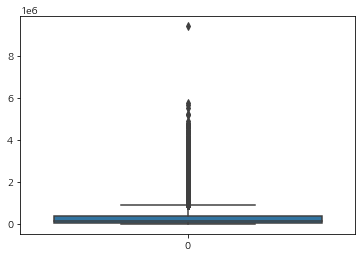

In [154]:
sns.boxplot(total_amount_by_customer_month_2021['total_sales_krw'])
plt.show()

In [ ]:
total_amount_by_customer_month_2021

In [218]:
Top_10per_2021_sales = total_amount_by_customer_month_2021['total_sales_krw'].quantile(0.9)
Top_10per_2021_sales

830558.0000000001

In [220]:
top_10per_2021 = total_amount_by_customer_month_2021[total_amount_by_customer_month_2021['total_sales_krw']>Top_10per_2021_sales]
top_10per_2021

,customer_id,access_year,total_sales_krw,avg_sales_krw
0,95492,2021,9417116,35806.524715
1,13789,2021,5763837,33706.649123
2,29496,2021,5671084,37807.226667
3,32658,2021,5527646,37348.959459
4,34082,2021,5252116,38336.613139
...,...,...,...,...
3604,94533,2021,831197,37781.681818
3605,4230,2021,831008,46167.111111
3606,25626,2021,830889,28651.344828
3607,8191,2021,830879,24437.617647


In [214]:
top_10per_2021_customer_idx = top_10per_2021['customer_id'].to_list()
top_10per_2021_customer = customer[customer['customer_id'].isin(top_10per_2021_customer_idx)]
top_10per_2021_customer

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,33
57,46018,Limar,Prabowo,c338fdcd-e1c4-4010-a20f-b1fac763d5c6,c338fdcd_e1c4_4010_a20f_b1fac763d5c6@startupca...,M,1995-10-27,iOS,a0203f8c-f041-416c-8055-0f381f6489ef,iPad; CPU iPad OS 9_3_6 like Mac OS X,-6.175562,106.930918,Jakarta Raya,Indonesia,2019-07-14,27
77,96570,Vino,Gunawan,6eaaf06d-cec7-4064-85d6-5dc9b496cc7a,6eaaf06d_cec7_4064_85d6_5dc9b496cc7a@zakyfound...,M,1999-02-28,Android,b74e80ec-32a2-4a78-881d-08b65a9fee5d,Android 6.0.1,-8.243490,114.545949,Bali,Indonesia,2017-07-30,23
96,1777,Devi,Andriani,96f9958e-505a-41b0-9dd0-c22150688f35,96f9958e_505a_41b0_9dd0_c22150688f35@startupca...,F,2000-05-09,iOS,5758039e-5a38-423a-9f95-a9cf4ef2ab15,iPhone; CPU iPhone OS 4_2_1 like Mac OS X,-6.613383,106.848101,Jawa Barat,Indonesia,2019-11-02,22
121,57346,Ibrani,Mahendra,30db5517-2d16-484c-90ab-16e583fd08ce,30db5517_2d16_484c_90ab_16e583fd08ce@startupca...,M,2000-07-25,Android,fac5ed55-6793-49f2-a78c-3ed845c2a831,Android 4.0.4,-6.244993,106.899572,Jakarta Raya,Indonesia,2020-07-18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99923,21187,Nrima,Lazuardi,b1cee7f6-7690-4766-8ab6-da85f377b10b,b1cee7f6_7690_4766_8ab6_da85f377b10b@startupca...,M,1999-10-16,Android,9dcd0487-b54a-41e6-b4ae-607d2b2cd3c4,Android 10,-8.461434,114.918042,Bali,Indonesia,2021-02-12,23
99939,57339,Karma,Waluyo,cd444eec-e226-4e88-b545-afb330ee245f,cd444eec_e226_4e88_b545_afb330ee245f@zakyfound...,M,1993-10-23,Android,08d68402-d904-4197-aa5b-e1050a712de3,Android 3.2,-6.711021,106.962996,Jawa Barat,Indonesia,2021-01-10,29
99969,75296,Ozy,Megantara,5cc39c33-e033-49ba-880d-104b51c1046a,5cc39c33_e033_49ba_880d_104b51c1046a@startupca...,M,1988-12-12,Android,26e3255b-a070-400f-ba99-533bba43ec1a,Android 4.4.1,-8.576075,115.272600,Bali,Indonesia,2017-10-21,34
99973,66067,Kamal,Hakim,8ee637c7-78cd-4691-b2f6-f7d989698956,8ee637c7_78cd_4691_b2f6_f7d989698956@startupca...,M,2002-06-04,Android,bacddbc7-46f3-4938-b4bb-de154203016e,Android 1.5,-8.356793,112.653530,Jawa Timur,Indonesia,2018-03-10,20


In [286]:
temp = pd.concat([customer.value_counts('gender').sort_index(), top_10per_2021_customer.value_counts('gender').sort_index()], axis=1).rename(columns={0:'total_counts', 1:'top10_counts'})
temp2 =pd.concat([customer.value_counts('gender', normalize=True).sort_index()*100, top_10per_2021_customer.value_counts('gender', normalize=True).sort_index()*100], axis=1).rename(columns={0:'_percent', 1:'top10_percent'})
pd.concat([temp, temp2], axis=1)

,total_counts,top10_counts,_percent,top10_percent
gender,,,,
F,64230,2337,64.23,64.75478
M,35770,1272,35.77,35.24522


In [288]:
print(f'전체 고객의 평균 나이는 {customer["age"].mean().round(1)}세 입니다.')
print(f'상위 10퍼센트 고객의 평균 나이는 {top_10per_2021_customer["age"].mean().round(1)}세 입니다.')

# 나이에 따른 평균 적인 구매력의 차이가 있을 것이라 생각했지만 딱히 없는 듯..

전체 고객의 평균 나이는 26.5세 입니다.
상위 10퍼센트 고객의 평균 나이는 26.3세 입니다.


# Trend

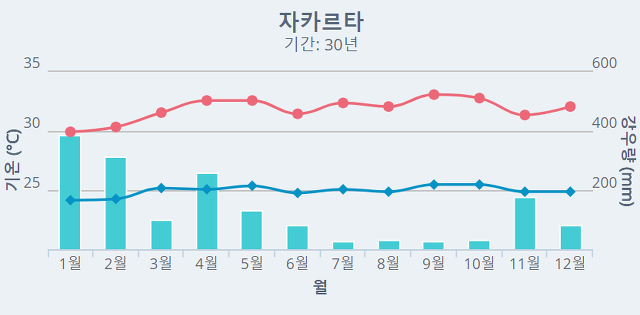

In [159]:
Image('./data/image/indonesia_weather.png')

In [160]:
customer_cnt__month_trend = paid_transaction_trend.groupby('access_ym')['customer_id'].nunique().to_frame().reset_index()
customer_cnt__month_trend = customer_cnt__month_trend.rename(columns={'customer_id':'customer_cnt'})
customer_cnt__month_trend

,access_ym,customer_cnt
0,2016-07,260
1,2016-08,470
2,2016-09,589
3,2016-10,769
4,2016-11,901
...,...,...
69,2022-04,17880
70,2022-05,17585
71,2022-06,16343
72,2022-07,10021


In [161]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [162]:
fig = px.line(customer_cnt__month_trend, x="access_ym", y="customer_cnt", title='customer_cnt by month')
fig.show()

In [163]:
amount__month_trend = paid_transaction_trend.groupby('access_ym')['total_item_price_krw'].agg(['mean', 'sum']).reset_index()
amount__month_trend = amount__month_trend.rename(columns={'mean':'avg_sales', 'sum':'total_sales'})
amount__month_trend

,access_ym,avg_sales,total_sales
0,2016-07,32423.386486,1.199665e+07
1,2016-08,30766.788535,2.415193e+07
2,2016-09,34369.672833,3.529765e+07
3,2016-10,30406.726765,4.351203e+07
4,2016-11,32148.658301,4.995902e+07
...,...,...,...
69,2022-04,31308.492902,1.292477e+09
70,2022-05,31214.103237,1.327036e+09
71,2022-06,31343.002581,1.262904e+09
72,2022-07,31560.327217,1.109377e+09


In [164]:
fig = px.line(amount__month_trend, x="access_ym", y="total_sales", title='Sales by month')
fig.show()

# 계속 성장하고 있으나
# 2월과 6월에 조금 성장이 주춤하는 경향이 있음
# 왜인지 잘 모르겠음

# 우선 계속 우상향하고 있는 것으로 보여짐

In [188]:
fig = make_subplots(rows=2, cols=4)
fig.update_layout(width=1500,height=600)

fig.add_trace(
    go.Scatter(x=amount__month_trend[amount__month_trend['access_ym'].str.contains('2016')]["access_ym"], 
               y=amount__month_trend[amount__month_trend['access_ym'].str.contains('2016')]["total_sales"], 
               mode='lines', name='2016'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=amount__month_trend[amount__month_trend['access_ym'].str.contains('2017')]["access_ym"], 
               y=amount__month_trend[amount__month_trend['access_ym'].str.contains('2017')]["total_sales"], 
               mode='lines', name='2017'),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=amount__month_trend[amount__month_trend['access_ym'].str.contains('2018')]["access_ym"], 
               y=amount__month_trend[amount__month_trend['access_ym'].str.contains('2018')]["total_sales"], 
               mode='lines', name='2018'),
    row=1, col=3
)
fig.add_trace(
    go.Scatter(x=amount__month_trend[amount__month_trend['access_ym'].str.contains('2019')]["access_ym"], 
               y=amount__month_trend[amount__month_trend['access_ym'].str.contains('2019')]["total_sales"], 
               mode='lines', name='2019'),
    row=1, col=4
)
fig.add_trace(
    go.Scatter(x=amount__month_trend[amount__month_trend['access_ym'].str.contains('2020')]["access_ym"], 
               y=amount__month_trend[amount__month_trend['access_ym'].str.contains('2020')]["total_sales"], 
               mode='lines', name='2020'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=amount__month_trend[amount__month_trend['access_ym'].str.contains('2021')]["access_ym"], 
               y=amount__month_trend[amount__month_trend['access_ym'].str.contains('2021')]["total_sales"], 
               mode='lines', name='2021'),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(x=amount__month_trend[amount__month_trend['access_ym'].str.contains('2022')]["access_ym"], 
               y=amount__month_trend[amount__month_trend['access_ym'].str.contains('2022')]["total_sales"], 
               mode='lines', name='2022'),
    row=2, col=3
)
fig.show()

In [167]:
fig = px.line(amount__month_trend, x="access_ym", y="avg_sales", title='Sales by month')
fig.show()

In [169]:
product['season'].value_counts()

# 겨울 옷은 우기와 연관이 있을지도 -> Winter? 우박 내리기도 함

Summer    21472
Fall      11431
Winter     8517
Spring     2983
Name: season, dtype: int64

## year_month pivot(total_price)

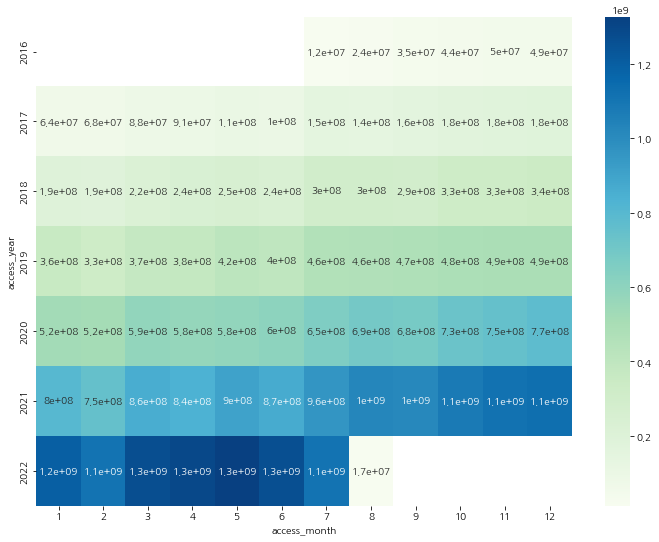

In [195]:
plt.figure(figsize=(12,9))
sns.heatmap(pd.pivot_table(paid_transaction_trend,
                       index = 'access_year',
                       columns = 'access_month',
                       values = 'total_item_price_krw',
                       aggfunc = 'sum'), 
            cmap='GnBu', annot=True)
plt.show()

## month_day pivot(total_price)

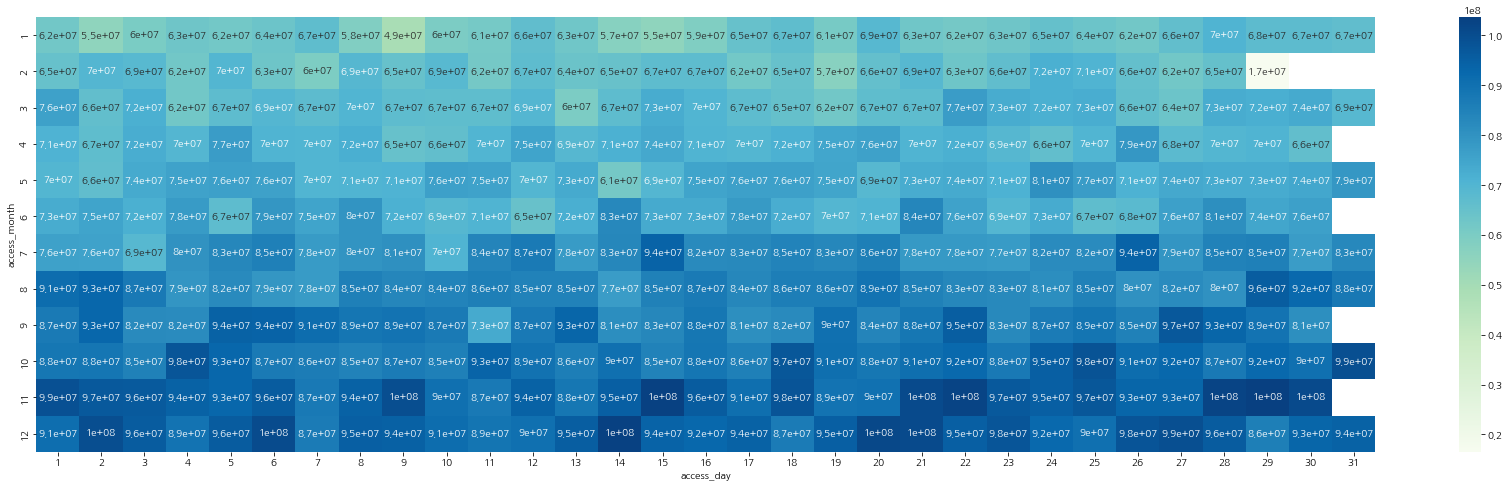

In [200]:
# 2017년부터 2021년(6개월씩 짤린거 빼고)
# 월, 일별 매출

plt.figure(figsize=(30,8))
sns.heatmap(pd.pivot_table(paid_transaction_trend.loc[~paid_transaction_trend['access_year'].isin([2016,2022])],
                       index = 'access_month',
                       columns = 'access_day',
                       values = 'total_item_price_krw',
                       aggfunc = 'sum'), 
            cmap='GnBu', annot=True)
plt.show()

## day_dayofweek pivot(total_price)

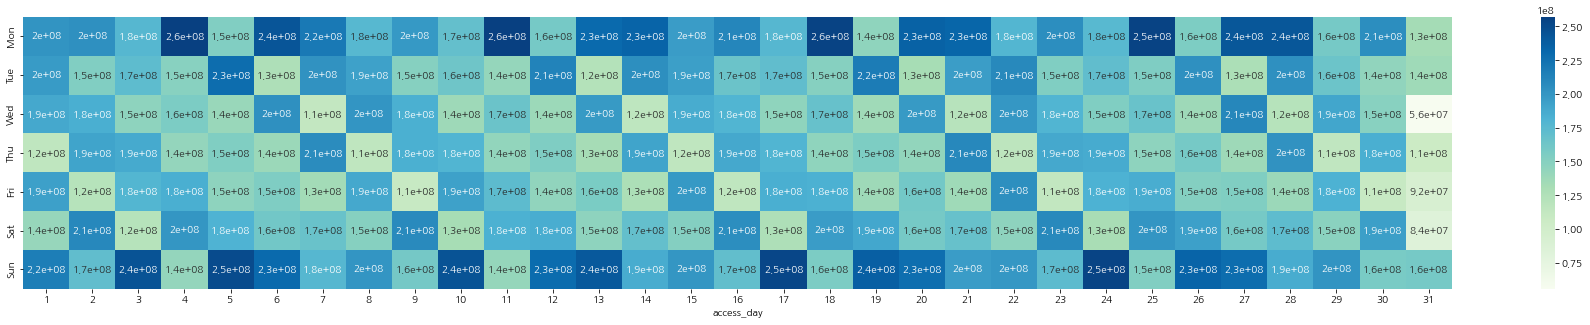

In [285]:
day_of_week = pd.Series(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.figure(figsize=(32,5))
sns.heatmap(pd.pivot_table(paid_transaction_trend,
                       index = 'access_day_of_week',
                       columns = 'access_day',
                       values = 'total_item_price_krw',
                       aggfunc = 'sum').set_index(day_of_week), 
            cmap='GnBu', annot=True)
plt.show()

# Merge transaction product

In [171]:
transaction_product = pd.merge(transaction_trend, product, how='left', left_on='product_id', right_on='id')
transaction_product

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,2016-07-01 06:18:44.792905+00:00,74089,2dd76c45-6ddb-46b4-9c91-c59d4f9b76ba,607d864b-76b5-45a1-a45d-7fb666a03ea1,LinkAja,Success,0,NaN,10000,2016-07-04T17:35:37.193849Z,...,33314.0,Men,Apparel,Topwear,Tshirts,Navy Blue,Fall,2012.0,Casual,Arrow New York Men Navy Blue Polo T-shirt
1,2016-07-01 09:53:26.720195+00:00,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,OVO,Success,6053,XX2022,10000,2016-07-06T03:05:41.261218Z,...,16061.0,Men,Apparel,Bottomwear,Trousers,Olive,Fall,2011.0,Casual,Highlander Men Solid Olive Trouser
2,2016-07-01 09:53:26.720195+00:00,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,OVO,Success,6053,XX2022,10000,2016-07-06T03:05:41.261218Z,...,7588.0,Men,Footwear,Shoes,Sports Shoes,Red,Summer,2011.0,Sports,Nike Men's Flyclave Red White Shoe
3,2016-07-01 16:45:51.803842+00:00,16228,8035f5b3-2a7c-4e30-ab4a-9b3091edc37f,bbff775e-4166-46aa-bbfd-4ba6465add17,Debit Card,Success,0,NaN,15000,2016-07-03T19:10:36.530785Z,...,47650.0,Women,Apparel,Dress,Dresses,Black,Summer,2012.0,Casual,Femella Women Black Lace Dress
4,2016-07-02 05:32:45.218400+00:00,73773,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,Debit Card,Success,0,NaN,10000,2016-07-06T16:02:10.388144Z,...,32185.0,Men,Footwear,Flip Flops,Flip Flops,Red,Fall,2012.0,Casual,ADIDAS Men Adi Surge Red Flip Flops
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2022-08-01 06:58:50.469277+00:00,81975,bbee4544-3d89-44f4-8fb7-d1796d3cd45e,6d4c72ec-b900-4c45-a37e-9cfe18452fc7,Debit Card,Success,0,NaN,0,2022-08-04T21:34:30.005045Z,...,50710.0,Women,Apparel,Topwear,Tops,Black,Summer,2012.0,Casual,Latin Quarters Women Black Top
1254581,2022-08-01 06:58:53.821469+00:00,19551,a465f4f3-6b1e-4421-9e71-979775a68c6c,9b4975c7-b06d-4d9a-b6b8-6bcda06540ea,Credit Card,Success,5800,WEEKENDSERU,10000,2022-08-05T06:00:29.292277Z,...,17773.0,Men,Accessories,Belts,Belts,Brown,Fall,2011.0,Formal,Reid & Taylor Men Brown Belt
1254582,2022-08-01 06:59:03.408424+00:00,22285,a43bfc27-6a49-465b-8690-901b8d79acef,f837b3a2-7908-42df-8969-3f879ebb4c25,LinkAja,Success,0,NaN,5000,2022-08-05T14:56:15.207147Z,...,27404.0,Women,Apparel,Innerwear,Bra,White,Summer,2017.0,Casual,Jockey Essence Jane White T-shirt Bra 1243
1254583,2022-08-01 06:59:19.821469+00:00,19551,1f9b9f8a-1a72-4e4c-87a6-355390a7abf6,b0043d8b-2b6a-443a-80f2-567486e79bf9,Gopay,Success,0,NaN,5000,2022-08-04T15:27:36.340498Z,...,25189.0,Women,Accessories,Bags,Handbags,Beige,Winter,2015.0,Casual,Lino Perros Women Classic Beige Handbag


In [172]:
transaction_product = transaction_product.drop('id', axis=1)
transaction_product

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,total_item_price_krw,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,2016-07-01 06:18:44.792905+00:00,74089,2dd76c45-6ddb-46b4-9c91-c59d4f9b76ba,607d864b-76b5-45a1-a45d-7fb666a03ea1,LinkAja,Success,0,NaN,10000,2016-07-04T17:35:37.193849Z,...,53618.0,Men,Apparel,Topwear,Tshirts,Navy Blue,Fall,2012.0,Casual,Arrow New York Men Navy Blue Polo T-shirt
1,2016-07-01 09:53:26.720195+00:00,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,OVO,Success,6053,XX2022,10000,2016-07-06T03:05:41.261218Z,...,13901.0,Men,Apparel,Bottomwear,Trousers,Olive,Fall,2011.0,Casual,Highlander Men Solid Olive Trouser
2,2016-07-01 09:53:26.720195+00:00,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,OVO,Success,6053,XX2022,10000,2016-07-06T03:05:41.261218Z,...,34964.0,Men,Footwear,Shoes,Sports Shoes,Red,Summer,2011.0,Sports,Nike Men's Flyclave Red White Shoe
3,2016-07-01 16:45:51.803842+00:00,16228,8035f5b3-2a7c-4e30-ab4a-9b3091edc37f,bbff775e-4166-46aa-bbfd-4ba6465add17,Debit Card,Success,0,NaN,15000,2016-07-03T19:10:36.530785Z,...,27097.0,Women,Apparel,Dress,Dresses,Black,Summer,2012.0,Casual,Femella Women Black Lace Dress
4,2016-07-02 05:32:45.218400+00:00,73773,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,Debit Card,Success,0,NaN,10000,2016-07-06T16:02:10.388144Z,...,20967.0,Men,Footwear,Flip Flops,Flip Flops,Red,Fall,2012.0,Casual,ADIDAS Men Adi Surge Red Flip Flops
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2022-08-01 06:58:50.469277+00:00,81975,bbee4544-3d89-44f4-8fb7-d1796d3cd45e,6d4c72ec-b900-4c45-a37e-9cfe18452fc7,Debit Card,Success,0,NaN,0,2022-08-04T21:34:30.005045Z,...,8548.0,Women,Apparel,Topwear,Tops,Black,Summer,2012.0,Casual,Latin Quarters Women Black Top
1254581,2022-08-01 06:58:53.821469+00:00,19551,a465f4f3-6b1e-4421-9e71-979775a68c6c,9b4975c7-b06d-4d9a-b6b8-6bcda06540ea,Credit Card,Success,5800,WEEKENDSERU,10000,2022-08-05T06:00:29.292277Z,...,11955.0,Men,Accessories,Belts,Belts,Brown,Fall,2011.0,Formal,Reid & Taylor Men Brown Belt
1254582,2022-08-01 06:59:03.408424+00:00,22285,a43bfc27-6a49-465b-8690-901b8d79acef,f837b3a2-7908-42df-8969-3f879ebb4c25,LinkAja,Success,0,NaN,5000,2022-08-05T14:56:15.207147Z,...,12779.0,Women,Apparel,Innerwear,Bra,White,Summer,2017.0,Casual,Jockey Essence Jane White T-shirt Bra 1243
1254583,2022-08-01 06:59:19.821469+00:00,19551,1f9b9f8a-1a72-4e4c-87a6-355390a7abf6,b0043d8b-2b6a-443a-80f2-567486e79bf9,Gopay,Success,0,NaN,5000,2022-08-04T15:27:36.340498Z,...,16773.0,Women,Accessories,Bags,Handbags,Beige,Winter,2015.0,Casual,Lino Perros Women Classic Beige Handbag


In [173]:
transaction_product.columns

Index(['created_at', 'customer_id', 'booking_id', 'session_id',
       'payment_method', 'payment_status', 'promo_amount', 'promo_code',
       'shipment_fee', 'shipment_date_limit', 'shipment_location_lat',
       'shipment_location_long', 'total_amount', 'product_id', 'quantity',
       'item_price', 'time_diff', 'access_ym', 'access_year', 'access_month',
       'access_day', 'access_day_of_week', 'total_item_price_krw', 'gender',
       'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season',
       'year', 'usage', 'productDisplayName'],
      dtype='object')

In [174]:
transaction_product['season'].value_counts()

Summer    606321
Fall      321851
Winter    240886
Spring     84305
Name: season, dtype: int64

In [175]:
transaction_product['gender'].value_counts()

Men       624729
Women     526897
Unisex     60513
Boys       23543
Girls      18284
Name: gender, dtype: int64

In [176]:
pd.crosstab(transaction_product['season'], transaction_product['gender'])

gender,Boys,Girls,Men,Unisex,Women
season,,,,,
Fall,3197,2291,199363,14006,102994
Spring,159,74,27319,2722,54031
Summer,19602,14959,306812,26388,238560
Winter,585,960,91010,17226,131105


In [177]:
transaction_product['masterCategory'].value_counts()

Apparel           604216
Accessories       317692
Footwear          260388
Personal Care      67988
Free Items          2987
Sporting Goods       676
Home                  19
Name: masterCategory, dtype: int64

In [178]:
paid_transaction_product = transaction_product[transaction_product['payment_status']=='Success']
paid_transaction_product

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,total_item_price_krw,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,2016-07-01 06:18:44.792905+00:00,74089,2dd76c45-6ddb-46b4-9c91-c59d4f9b76ba,607d864b-76b5-45a1-a45d-7fb666a03ea1,LinkAja,Success,0,NaN,10000,2016-07-04T17:35:37.193849Z,...,53618.0,Men,Apparel,Topwear,Tshirts,Navy Blue,Fall,2012.0,Casual,Arrow New York Men Navy Blue Polo T-shirt
1,2016-07-01 09:53:26.720195+00:00,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,OVO,Success,6053,XX2022,10000,2016-07-06T03:05:41.261218Z,...,13901.0,Men,Apparel,Bottomwear,Trousers,Olive,Fall,2011.0,Casual,Highlander Men Solid Olive Trouser
2,2016-07-01 09:53:26.720195+00:00,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,OVO,Success,6053,XX2022,10000,2016-07-06T03:05:41.261218Z,...,34964.0,Men,Footwear,Shoes,Sports Shoes,Red,Summer,2011.0,Sports,Nike Men's Flyclave Red White Shoe
3,2016-07-01 16:45:51.803842+00:00,16228,8035f5b3-2a7c-4e30-ab4a-9b3091edc37f,bbff775e-4166-46aa-bbfd-4ba6465add17,Debit Card,Success,0,NaN,15000,2016-07-03T19:10:36.530785Z,...,27097.0,Women,Apparel,Dress,Dresses,Black,Summer,2012.0,Casual,Femella Women Black Lace Dress
4,2016-07-02 05:32:45.218400+00:00,73773,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,Debit Card,Success,0,NaN,10000,2016-07-06T16:02:10.388144Z,...,20967.0,Men,Footwear,Flip Flops,Flip Flops,Red,Fall,2012.0,Casual,ADIDAS Men Adi Surge Red Flip Flops
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254579,2022-08-01 06:58:50.469277+00:00,81975,bbee4544-3d89-44f4-8fb7-d1796d3cd45e,6d4c72ec-b900-4c45-a37e-9cfe18452fc7,Debit Card,Success,0,NaN,0,2022-08-04T21:34:30.005045Z,...,17881.0,Women,Apparel,Topwear,Shirts,Black,Summer,2011.0,Casual,United Colors of Benetton Women Solid Black Sh...
1254580,2022-08-01 06:58:50.469277+00:00,81975,bbee4544-3d89-44f4-8fb7-d1796d3cd45e,6d4c72ec-b900-4c45-a37e-9cfe18452fc7,Debit Card,Success,0,NaN,0,2022-08-04T21:34:30.005045Z,...,8548.0,Women,Apparel,Topwear,Tops,Black,Summer,2012.0,Casual,Latin Quarters Women Black Top
1254581,2022-08-01 06:58:53.821469+00:00,19551,a465f4f3-6b1e-4421-9e71-979775a68c6c,9b4975c7-b06d-4d9a-b6b8-6bcda06540ea,Credit Card,Success,5800,WEEKENDSERU,10000,2022-08-05T06:00:29.292277Z,...,11955.0,Men,Accessories,Belts,Belts,Brown,Fall,2011.0,Formal,Reid & Taylor Men Brown Belt
1254582,2022-08-01 06:59:03.408424+00:00,22285,a43bfc27-6a49-465b-8690-901b8d79acef,f837b3a2-7908-42df-8969-3f879ebb4c25,LinkAja,Success,0,NaN,5000,2022-08-05T14:56:15.207147Z,...,12779.0,Women,Apparel,Innerwear,Bra,White,Summer,2017.0,Casual,Jockey Essence Jane White T-shirt Bra 1243


In [179]:
paid_transaction_product['season'].value_counts()

Summer    580532
Fall      308223
Winter    230469
Spring     80642
Name: season, dtype: int64

In [180]:
paid_transaction_product['gender'].value_counts()

Men       598393
Women     504099
Unisex     57911
Boys       22561
Girls      17480
Name: gender, dtype: int64

In [181]:
paid_transaction_product['masterCategory'].value_counts()

Apparel           578738
Accessories       303952
Footwear          249236
Personal Care      65006
Free Items          2851
Sporting Goods       646
Home                  15
Name: masterCategory, dtype: int64

## Season(product)_Gender(product) pivot(total_price)

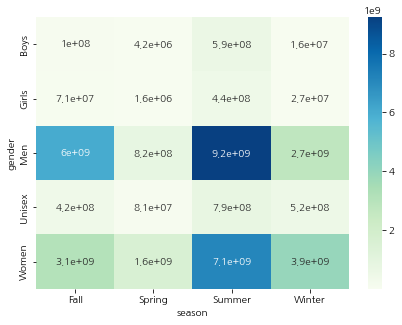

In [299]:
plt.figure(figsize=(7,5))
sns.heatmap(pd.pivot_table(paid_transaction_product, values='total_item_price_krw', index='gender', columns='season', aggfunc='sum'),
            cmap='GnBu', annot=True)
plt.show()

## Season(Product)_Category pivot(total_price)

<AxesSubplot:xlabel='masterCategory', ylabel='season'>

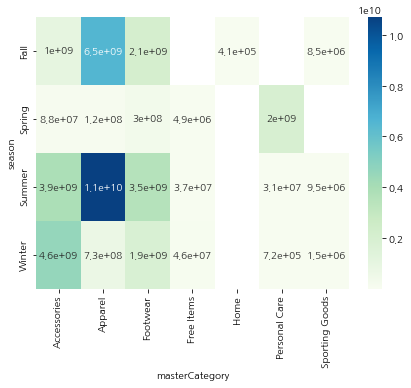

In [192]:
plt.figure(figsize=(7,5))
sns.heatmap(pd.pivot_table(paid_transaction_product, values='total_item_price_krw', index='season', columns='masterCategory', aggfunc='sum'),
            cmap='GnBu', annot=True)
plt.show()

## Gender(product)_Category pivot(total_price)

<AxesSubplot:xlabel='masterCategory', ylabel='gender'>

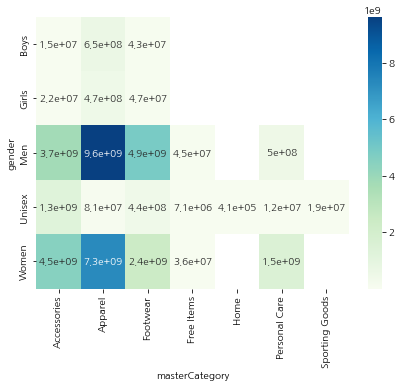

In [194]:
plt.figure(figsize=(7,5))
sns.heatmap(pd.pivot_table(paid_transaction_product, values='total_item_price_krw', index='gender', columns='masterCategory', aggfunc='sum'),
            cmap='GnBu', annot=True)
plt.show()

## Season(product)_Month pivot(total_price)

<AxesSubplot:xlabel='access_month', ylabel='season'>

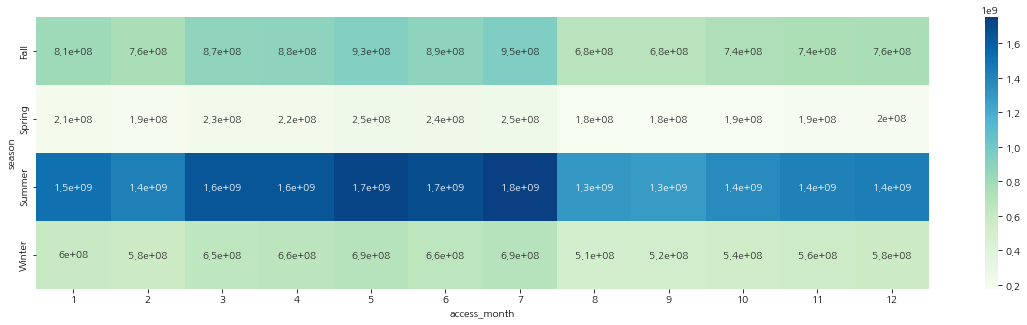

In [291]:
plt.figure(figsize=(20,5))
sns.heatmap(pd.pivot_table(paid_transaction_product, values='total_item_price_krw', index='season', columns='access_month', aggfunc='sum'),
            cmap='GnBu', annot=True)
plt.show()

## MasterCategory_Month pivot(total_price)

<AxesSubplot:xlabel='access_month', ylabel='masterCategory'>

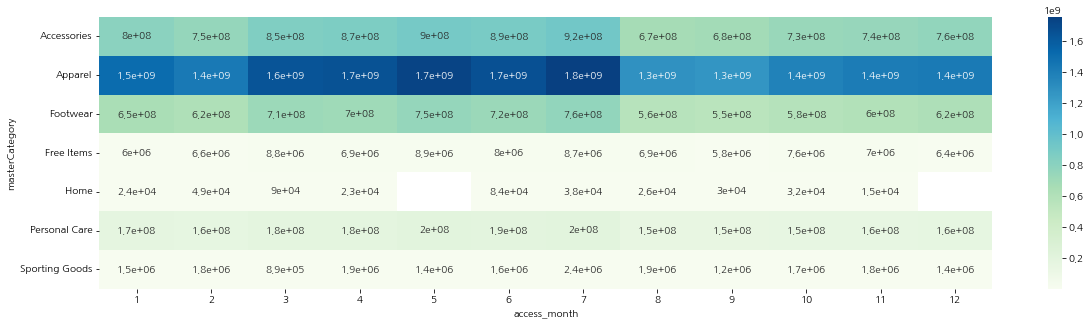

In [296]:
plt.figure(figsize=(20,5))
sns.heatmap(pd.pivot_table(paid_transaction_product, values='total_item_price_krw', index='masterCategory', columns='access_month', aggfunc='sum'),
            cmap='GnBu', annot=True)
plt.show()

## Gender(product)_Month pivot(total_price)

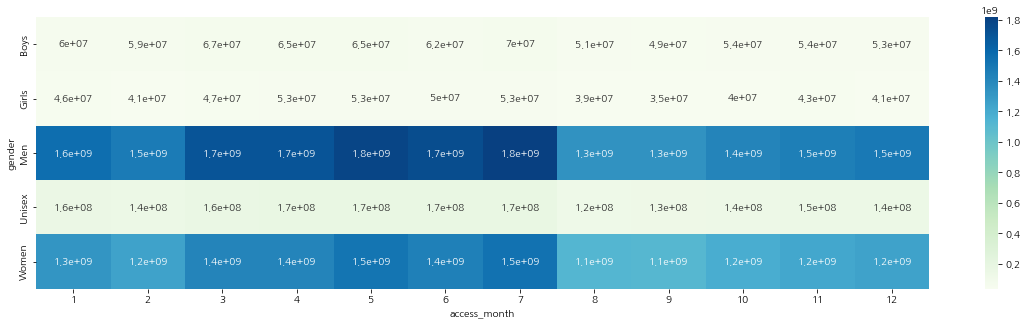

In [298]:
plt.figure(figsize=(20,5))
sns.heatmap(pd.pivot_table(paid_transaction_product, values='total_item_price_krw', index='gender', columns='access_month', aggfunc='sum'),
            cmap='GnBu', annot=True)
plt.show()

# Merge customer data

# Cancelled Data